# Introdução a PyMC3

In [199]:
import warnings
import sklearn
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import theano.tensor as tt
from scipy.stats import norm
import seaborn as sns

az.style.use("arviz-darkgrid")
warnings.simplefilter(action="ignore", category=FutureWarning)

print(f"Running on PyMC3 v{pm.__version__}")
print(f"Running on ArviZ v{az.__version__}")

Running on PyMC3 v3.11.4
Running on ArviZ v0.11.4


## help ,dir: : Informação sobre funções


In [184]:
#help(pm.Model)
help(pm.Distribution)
#help(pm.Normal)
#help(az)
#help(tt)
#help(pm.sample)
#help(trace)

Help on class Distribution in module pymc3.distributions.distribution:

class Distribution(builtins.object)
 |  Distribution(name, *args, **kwargs)
 |  
 |  Statistical distribution
 |  
 |  Methods defined here:
 |  
 |  __getnewargs__(self)
 |  
 |  __init__(self, shape, dtype, testval=None, defaults=(), transform=None, broadcastable=None, dims=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __latex__ = _repr_latex_(self, *, formatting='latex_with_params', **kwargs)
 |  
 |  __str__(self, **kwargs)
 |      Return str(self).
 |  
 |  default(self)
 |  
 |  get_test_val(self, val, defaults)
 |  
 |  getattr_value(self, val)
 |  
 |  logp_nojac(self, *args, **kwargs)
 |      Return the logp, but do not include a jacobian term for transforms.
 |      
 |      If we use different parametrizations for the same distribution, we
 |      need to add the determinant of the jacobian of the transformation
 |      to make sure the densities still describe the

In [194]:
#dir(pm.distributions)
#dir(pm.distributions.mixture)
#dir(pm.distributions.continuous)
list(filter(lambda x: "Normal" in x, dir(pm.distributions)))

#dir(pm.Model)
#list(filter(lambda x: "logp" in x, dir(pm.Model)))

['HalfNormal',
 'KroneckerNormal',
 'LogitNormal',
 'MatrixNormal',
 'MvNormal',
 'Normal',
 'NormalMixture',
 'SkewNormal',
 'TruncatedNormal']

### Modelo de uma distribuição e plot

model = pm.Model()
 
with model:
    #definir variaveis que queremos medir
    x = pm.Normal('Normal1', mu=5.5, tau=2)  
    
    #definir trace
    trace = pm.sample(1000)
    
    # plot/ outro tipo de analise
    print(az.summary(trace))
    pm.plot_trace(trace) 


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [Normal]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 5 seconds.


         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
Normal  5.513  0.688   4.323    6.878      0.024    0.017     814.0    1247.0   

        r_hat  
Normal    1.0  


array(-2.82236494)

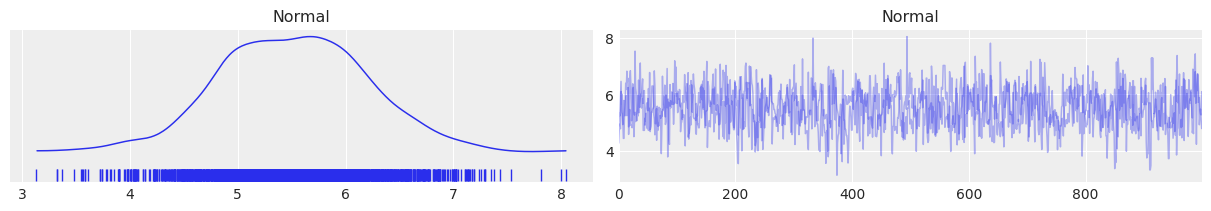

In [200]:
model = pm.Model()
 
with model:
    x = pm.Normal('Normal', mu=5.5, tau=2)    
    trace = pm.sample(1000)

    print(az.summary(trace))
    pm.plot_trace(trace,rug = True,combined=True,chain_prop={"ls": "-"})
model.logp({'Normal': 4})
    


In [201]:
#distribuição fora do modelo
xdist = pm.Normal.dist(mu=5.5, tau=2)

print("lista de valores",xdist.random(size=10))
xdist.logp(4).eval()

lista de valores [4.71105431 4.75599194 6.18448746 5.72386699 6.46726071 5.4905734
 5.03014571 4.77208604 5.15042474 4.95230046]


array(-2.82236494)

### Outras distribuições

Sequential sampling (2 chains in 1 job)
CompoundStep
>NUTS: [Uniform, Gamma, Exponential, Beta, Normal]
>BinaryGibbsMetropolis: [Bernoulli]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 15 seconds.


               mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Normal        5.517   0.679   4.326    6.876      0.015    0.011    1975.0   
Bernoulli     0.206   0.405   0.000    1.000      0.009    0.006    1969.0   
Beta          0.302   0.319   0.000    0.922      0.007    0.005    1579.0   
Exponential   0.345   0.353   0.000    1.037      0.009    0.006    1127.0   
Gamma         3.000   1.663   0.349    5.932      0.040    0.028    1336.0   
Uniform      50.421  28.318   1.308   93.800      0.710    0.525    1513.0   

             ess_tail  r_hat  
Normal         1461.0    1.0  
Bernoulli      1969.0    1.0  
Beta           1006.0    1.0  
Exponential     770.0    1.0  
Gamma           931.0    1.0  
Uniform        1203.0    1.0  


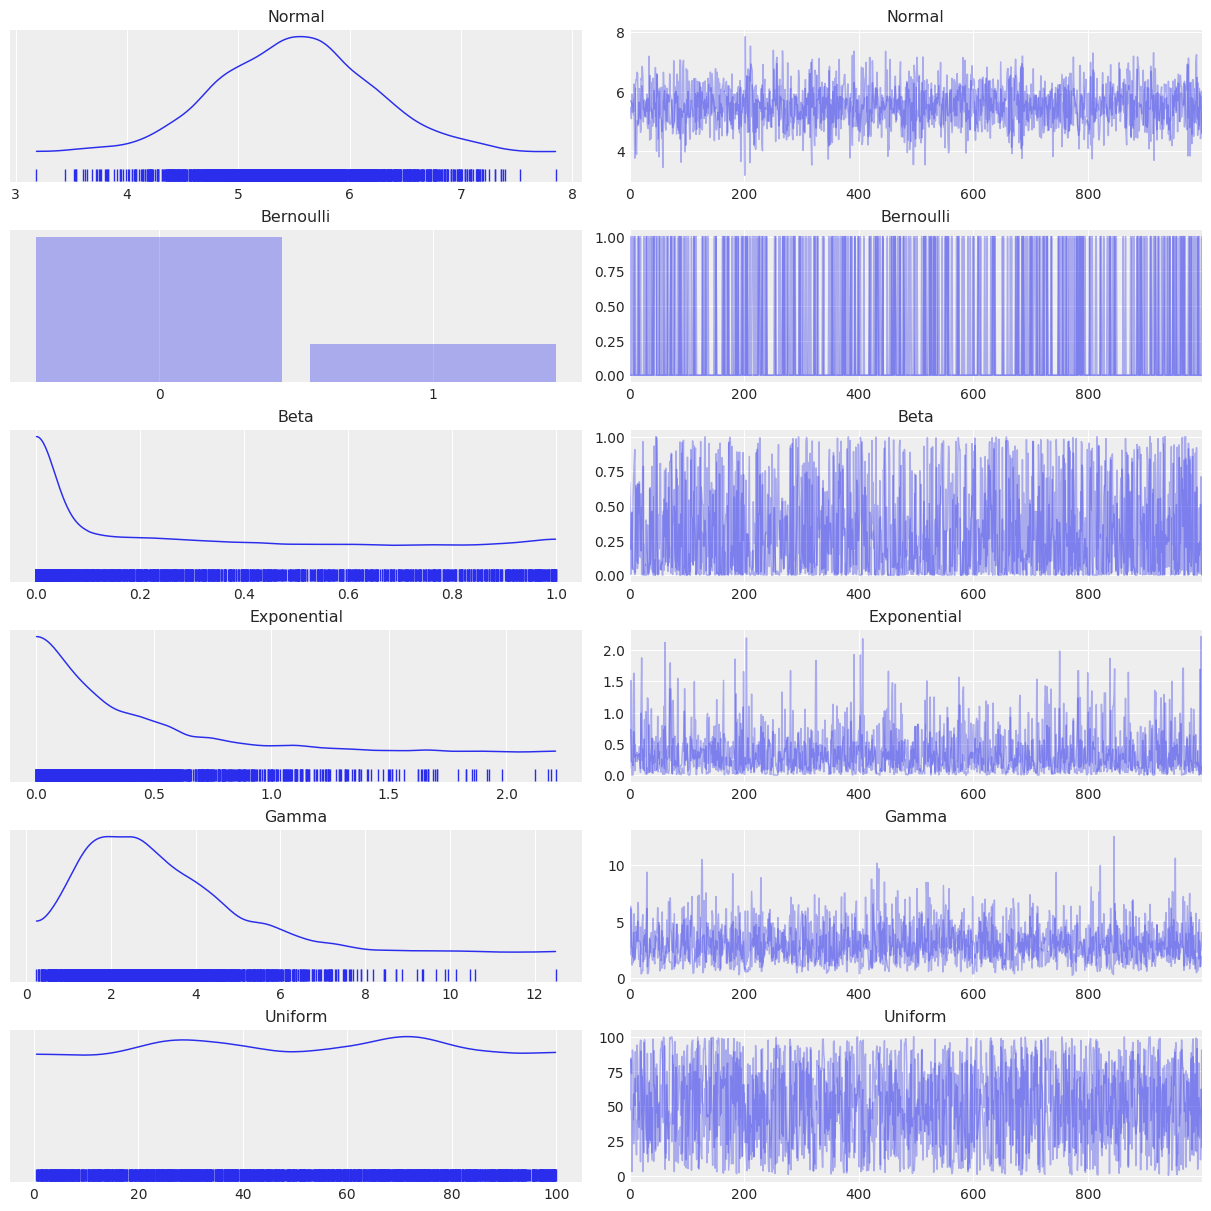

In [205]:
model = pm.Model()

# por comentarios com os parametros
with model:
    
        #Normal([mu, sd, tau])
    n = pm.Normal('Normal', mu=5.5, tau=2)
    
        #Beta([alpha, beta, mu, sd])
    b = pm.Beta('Beta', 0.3, 0.7) 
    
        #Bernoulli(p, *args, **kwargs)
    b2=pm.Bernoulli('Bernoulli', .2)

        #Exponential(lam, *args, **kwargs)
    e = pm.Exponential('Exponential', 3)
    
        #Gamma([alpha, beta, mu, sd])
    s = pm.Gamma('Gamma', alpha=3., beta=1.)
    
        #Uniform([lower, upper, transform])
    t = pm.Uniform('Uniform', 0, 100)
    
    trace = pm.sample(1000)
    
    print(az.summary(trace))
    pm.plot_trace(trace,rug = True,combined=True,chain_prop={"ls": "-"})
    

### Step: diferentes métodos 

In [158]:
list(filter(lambda x: x[0].isupper(), dir(pm.step_methods)))

['BinaryGibbsMetropolis',
 'BinaryMetropolis',
 'CategoricalGibbsMetropolis',
 'CauchyProposal',
 'CompoundStep',
 'DEMetropolis',
 'DEMetropolisZ',
 'DEMetropolisZMLDA',
 'ElemwiseCategorical',
 'EllipticalSlice',
 'HamiltonianMC',
 'LaplaceProposal',
 'MLDA',
 'Metropolis',
 'MetropolisMLDA',
 'MultivariateNormalProposal',
 'NUTS',
 'NormalProposal',
 'PGBART',
 'PoissonProposal',
 'RecursiveDAProposal',
 'Slice',
 'UniformProposal']

#### Metodo Metropolis

Sequential sampling (2 chains in 1 job)
Metropolis: [Normal1]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2 seconds.
The number of effective samples is smaller than 25% for some parameters.


             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Normal1[0]  5.483  0.706   4.173    6.773      0.034    0.024     437.0   

            ess_tail  r_hat  
Normal1[0]     403.0    1.0  


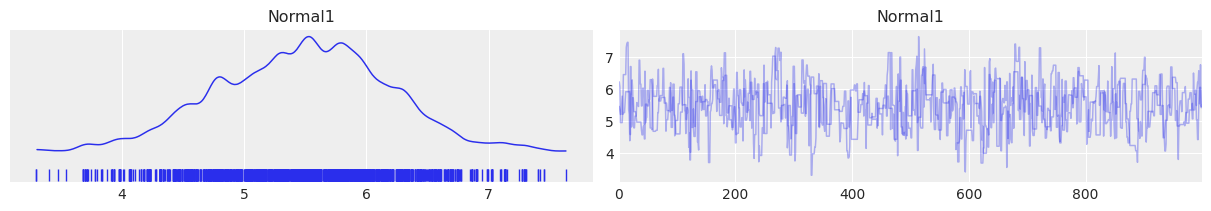

In [207]:
model = pm.Model()
 
with model:
    x = pm.Normal('Normal1', mu=5.5, tau=2, shape=1) 
    
    step=pm.Metropolis()
    trace = pm.sample(1000,step=step) #este step=step é obrigatorio senao by default ele usa NUTS()

    print(az.summary(trace))
    pm.plot_trace(trace,rug = True,combined=True,chain_prop={"ls": "-"})

## Inferencia Variacional, VI

### Comparação para modelo basico

#### Modelo defidino como ate agora

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 5 seconds.


<MultiTrace: 2 chains, 1000 iterations, 2 variables>


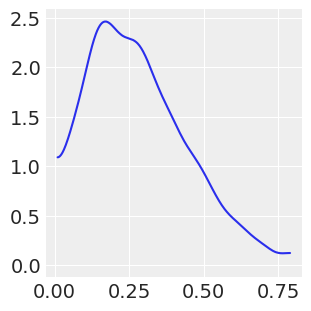

In [208]:
model = pm.Model()
 
with model:
    v = pm.Beta('beta', 2, 5)

    trace=pm.sample(1000)
    print(trace)
    az.plot_dist(trace["beta"],figsize=[3,3])

#### metodo SVGD: Stein Variational Gradient Descent

<MultiTrace: 1 chains, 1000 iterations, 2 variables>


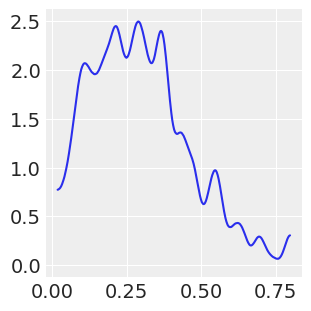

In [209]:
#PyMC3 supports various Variational Inference techniques.
#While these methods are much faster, they are often also less accurate 
#and can lead to biased inference. 

model = pm.Model()
 
with model:
    v = pm.Beta('beta', 2, 5)
    
    approx = pm.fit(method=pm.SVGD(n_particles=200, jitter=1.0))
    
    trace = approx.sample(1000)
    print(trace)
    az.plot_dist(trace["beta"],figsize=[3,3])
    
    

#### Método fullrank_advi: Automatic Differentiation Variational Inference

Finished [100%]: Average Loss = 0.019123


<MultiTrace: 1 chains, 1000 iterations, 2 variables>


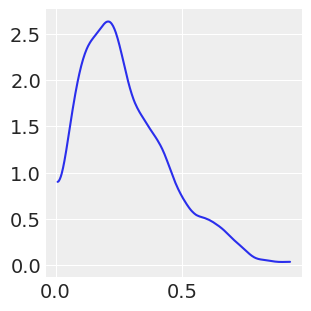

In [210]:
model = pm.Model()
 
with model:
    v = pm.Beta('beta', 2, 5)

    approx = pm.fit(method="fullrank_advi")
    
    trace = approx.sample(1000)
    print(trace)
    az.plot_dist(trace["beta"],figsize=[3,3])
    
    

### Comparaçao para Mixture Models

#### Modelo do teste por sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [x]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 6 seconds.
There were 328 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.1454877030456978, but should be close to 0.8. Try to increase the number of tuning steps.
There were 328 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


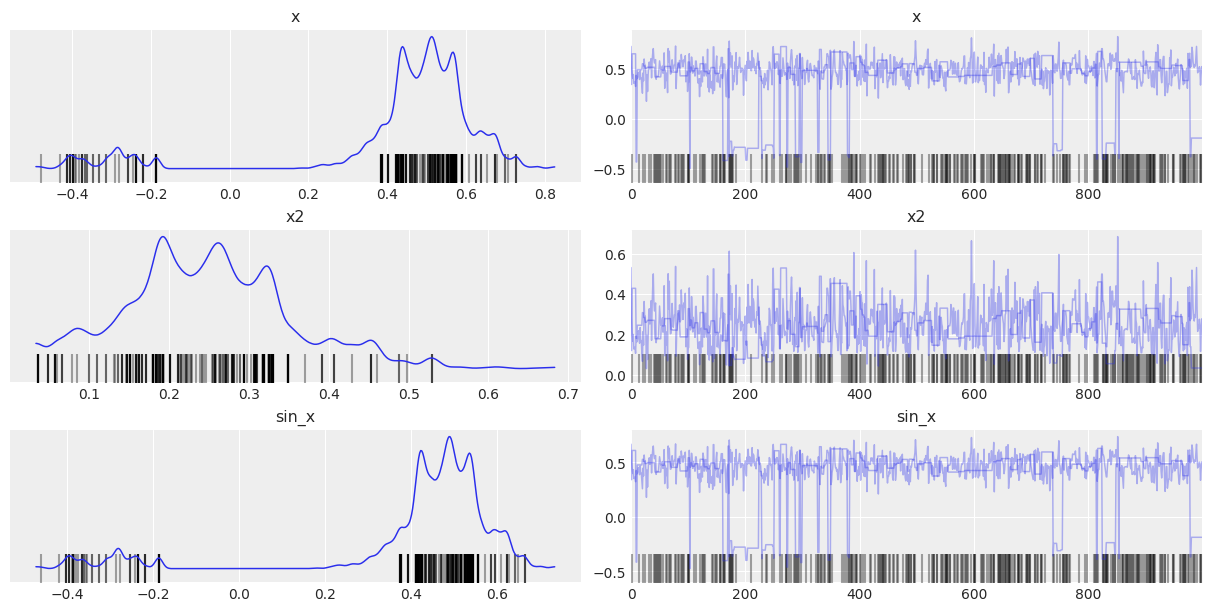

In [211]:
w = pm.floatX([.2, .8])
mu = pm.floatX([-.3, .5])
sd = pm.floatX([.1, .1])
with pm.Model() as model:
    x = pm.NormalMixture('x', w=w, mu=mu, sd=sd, dtype=tt.config.floatX)
    x2 = x ** 2
    sin_x = pm.math.sin(x)
    pm.Deterministic('x2', x2)
    pm.Deterministic('sin_x', sin_x)
    trace = pm.sample(1000)
    pm.plot_trace(trace,combined=True,chain_prop={"ls": "-"})


#### Metodo ADVI: Adaptively Setting Path Length

Finished [100%]: Average Loss = 2.0467


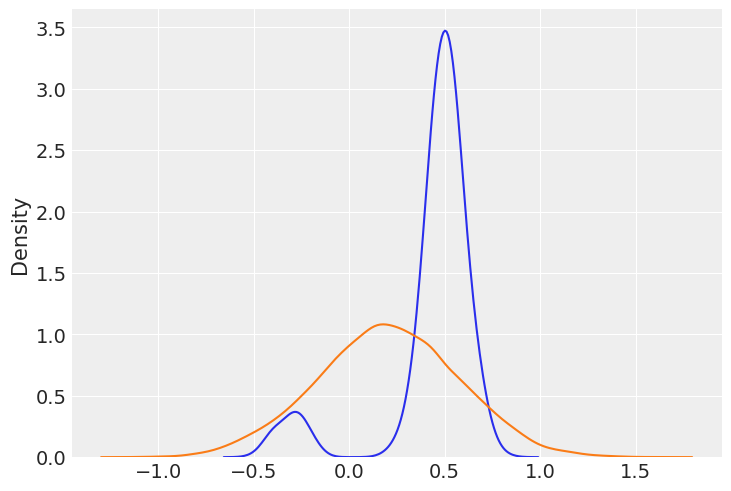

In [212]:
with model:
    advi=pm.ADVI()
    approx = advi.fit(100000)
    
    ax = sns.kdeplot(trace['x'], label='NUTS')
    sns.kdeplot(approx.sample(10000)['x'], label='ADVI')

#### Metodo SVGD: Stein Variational Gradient Descent

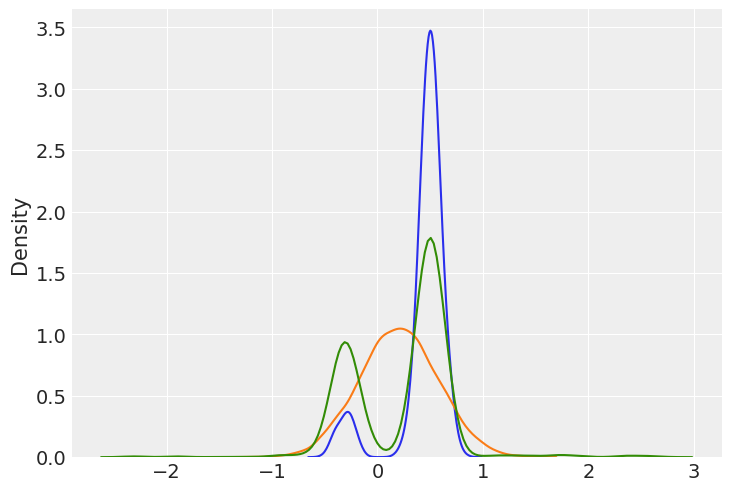

In [213]:
with model:
    svgd_approx = pm.fit(300, method='svgd', inf_kwargs=dict(n_particles=1000),
    obj_optimizer=pm.sgd(learning_rate=0.01))
    
ax = sns.kdeplot(trace['x'], label='NUTS');
sns.kdeplot(approx.sample(10000)['x'], label='ADVI');
sns.kdeplot(svgd_approx.sample(2000)['x'], label='SVGD');

## Variaveis Observadas, OV

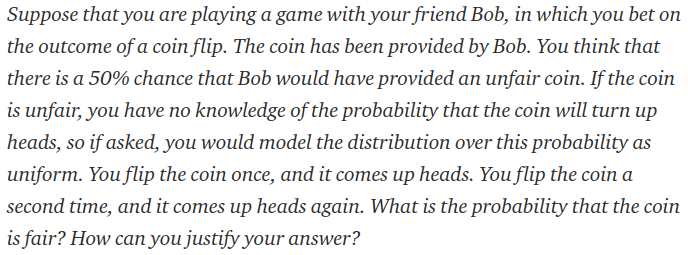

Sequential sampling (2 chains in 1 job)
CompoundStep
>BinaryGibbsMetropolis: [which_coin]
>NUTS: [theta_biased]


Sampling 2 chains for 2_500 tune and 5_000 draw iterations (5_000 + 10_000 draws total) took 13 seconds.


p(coin=fair|HH)=0.4293


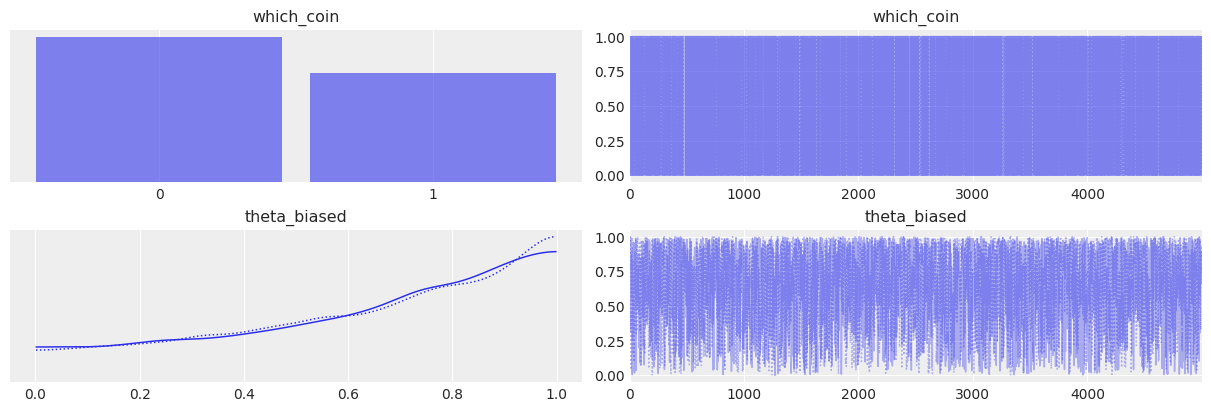

In [137]:
with pm.Model() as coinflip:
    which_coin = pm.Bernoulli('which_coin', 0.5)
    theta_biased = pm.Uniform('theta_biased', 0, 1)
    p = pm.math.switch(which_coin > 0.5, 0.5, theta_biased) #if-else” statement. 
    #se which_coin=1, entao 𝜃=0.5, senao é uniformemente distribuido.
    
              #Binomial(n, p, *args, **kwargs)
    heads = pm.Binomial('heads', n=2, p=p, observed=2)
    #lanca se 2x a moeda(n=2) e vemos 2 caras (observed=2)
    
    coin_trace = pm.sample(5000, tune=2500)
    pm.plot_trace(coin_trace);

print('p(coin=fair|HH)={}'.format(
    coin_trace['which_coin'].mean()
))


In [145]:
coinflip.basic_RVs

[which_coin ~ Bernoulli,
 theta_biased_interval__ ~ TransformedDistribution,
 heads ~ Binomial]

In [146]:
coinflip.free_RVs

[which_coin ~ Bernoulli, theta_biased_interval__ ~ TransformedDistribution]

In [144]:
coinflip.observed_RVs

[heads ~ Binomial]

## funcionalidades do ArviZ

In [164]:
list(filter(lambda x: "plot" in x, dir(az)))

['plot_autocorr',
 'plot_bpv',
 'plot_compare',
 'plot_density',
 'plot_dist',
 'plot_dist_comparison',
 'plot_dot',
 'plot_elpd',
 'plot_energy',
 'plot_ess',
 'plot_forest',
 'plot_hdi',
 'plot_joint',
 'plot_kde',
 'plot_khat',
 'plot_lm',
 'plot_loo_pit',
 'plot_mcse',
 'plot_pair',
 'plot_parallel',
 'plot_posterior',
 'plot_ppc',
 'plot_rank',
 'plot_separation',
 'plot_trace',
 'plot_ts',
 'plot_violin',
 'plots']

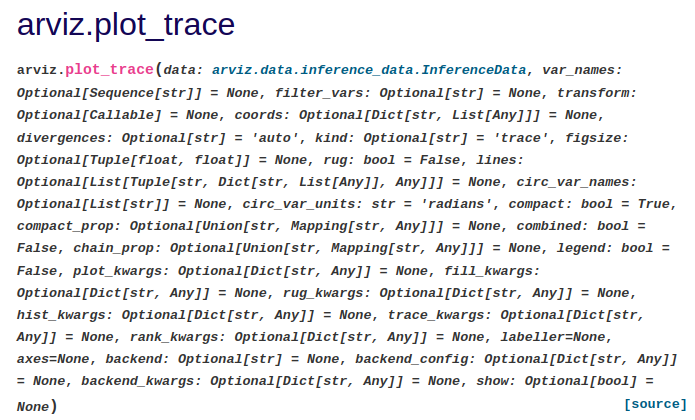

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Normal1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


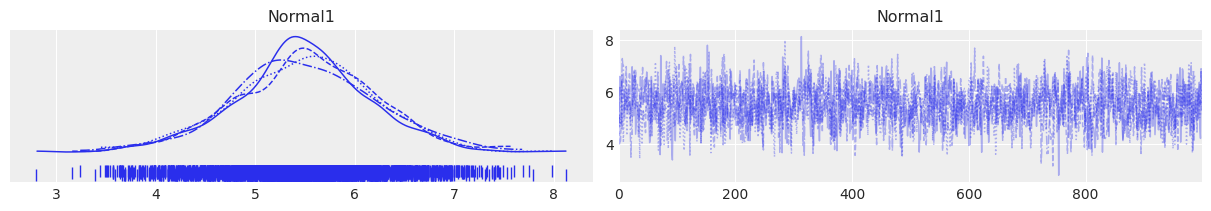

In [198]:
model = pm.Model()
 
with model:
    x = pm.Normal('Normal1', mu=5.5, tau=2)    
    trace = pm.sample(1000,cores=4)

    pm.plot_trace(trace,rug=True)
    #pm.plot_trace(trace,rug = True,combined=False,chain_prop="color")
    
